## Import Library

In [1]:
import pandas as pd
import string
import datetime as dt
import numpy as np
import os
import re
import csv
import requests
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Embedding, Dropout, Dense, Flatten, SpatialDropout1D, Conv1D, GlobalMaxPooling1D, Bidirectional, MaxPooling1D, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, Callback , ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight

In [3]:
from tensorflow.keras.models import load_model
import pickle
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Data 1

In [4]:
df1 = pd.read_csv('preprocessed_dataset.csv')

In [5]:
df1

,original,translated,cleaned_text,label,casefolded,tokenized,filtered,stemmed,final_sentence
0,My father - all of my life - has shifted betwe...,Ayah saya - sepanjang hidup saya - telah berge...,Ayah saya sepanjang hidup saya telah bergeser ...,0,ayah saya sepanjang hidup saya telah bergeser ...,"['ayah', 'saya', 'sepanjang', 'hidup', 'saya',...","['ayah', 'hidup', 'bergeser', 'monster', 'terb...","['ayah', 'hidup', 'geser', 'monster', 'baik', ...",ayah hidup geser monster baik dukung tenang po...
1,I have health anxiety where I go to the doctor...,Saya memiliki kecemasan kesehatan di mana saya...,Saya memiliki kecemasan kesehatan di mana saya...,3,saya memiliki kecemasan kesehatan di mana saya...,"['saya', 'memiliki', 'kecemasan', 'kesehatan',...","['kecemasan', 'kesehatan', 'pergi', 'dokter', ...","['cemas', 'sehat', 'pergi', 'dokter', 'sakit',...",cemas sehat pergi dokter sakit kepala sederhan...
2,I was thinking about the differences between B...,Saya sedang memikirkan perbedaan antara BPD da...,Saya sedang memikirkan perbedaan antara BPD da...,0,saya sedang memikirkan perbedaan antara bpd da...,"['saya', 'sedang', 'memikirkan', 'perbedaan', ...","['memikirkan', 'perbedaan', 'bpd', 'cptsd', 'a...","['pikir', 'beda', 'bpd', 'cptsd', 'aspek', 'ut...",pikir beda bpd cptsd aspek utama bpd alami tra...
3,Let me preface this by saying that I promise I...,Izinkan saya mengawali ini dengan mengatakan b...,Izinkan saya mengawali ini dengan mengatakan b...,2,izinkan saya mengawali ini dengan mengatakan b...,"['izinkan', 'saya', 'mengawali', 'ini', 'denga...","['izinkan', 'mengawali', 'berjanji', 'berbicar...","['izin', 'awal', 'janji', 'bicara', 'terap', '...",izin awal janji bicara terap percaya rabu deti...
4,"I've been exploring this forum for awhile, and...",Saya telah menjelajahi forum ini untuk sementa...,Saya telah menjelajahi forum ini untuk sementa...,0,saya telah menjelajahi forum ini untuk sementa...,"['saya', 'telah', 'menjelajahi', 'forum', 'ini...","['menjelajahi', 'forum', 'tes', 'bpd', 'konyol...","['jajah', 'forum', 'tes', 'bpd', 'konyol', 'on...",jajah forum tes bpd konyol online dasar asa ma...
...,...,...,...,...,...,...,...,...,...
32525,"Hi everyone,\n\nI’m scared of something that h...","Hai semuanya,\n\nSaya takut pada sesuatu yang ...",Hai semuanya Saya takut pada sesuatu yang terj...,3,hai semuanya saya takut pada sesuatu yang terj...,"['hai', 'semuanya', 'saya', 'takut', 'pada', '...","['hai', 'takut', '17', 'minggu', '2', 'berhubu...","['hai', 'takut', '17', 'minggu', '2', 'hubung'...",hai takut 17 minggu 2 hubung seks gadis hookup...
32526,I keep having a lot of recent health anxiety r...,Saya terus mengalami banyak mimpi terkait kece...,Saya terus mengalami banyak mimpi terkait kece...,3,saya terus mengalami banyak mimpi terkait kece...,"['saya', 'terus', 'mengalami', 'banyak', 'mimp...","['mengalami', 'mimpi', 'terkait', 'kecemasan',...","['alami', 'mimpi', 'kait', 'cemas', 'sehat', '...",alami mimpi kait cemas sehat dengar suara suar...
32527,I'm not diagnosed with BPD but identify with a...,Saya tidak didiagnosis dengan BPD tetapi mengi...,Saya tidak didiagnosis dengan BPD tetapi mengi...,0,saya tidak didiagnosis dengan bpd tetapi mengi...,"['saya', 'tidak', 'didiagnosis', 'dengan', 'bp...","['didiagnosis', 'bpd', 'mengidentifikasi', 'ge...","['diagnosis', 'bpd', 'identifikasi', 'gejala',...",diagnosis bpd identifikasi gejala sesal mempos...
32528,"Whenever I'm panicking about something, and so...","Setiap kali saya panik tentang sesuatu, dan ka...",Setiap kali saya panik tentang sesuatu dan kad...,3,setiap kali saya panik tentang sesuatu dan kad...,"['setiap', 'kali', 'saya', 'panik', 'tentang',...","['kali', 'panik', 'kadang', 'kadang', 'alasan'...","['kali', 'panik', 'kadang', 'kadang', 'alas', ...",kali panik kadang kadang alas tenggorok tutup ...


In [6]:
df1.shape

(32530, 9)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32530 entries, 0 to 32529
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   original        32530 non-null  object
 1   translated      32530 non-null  object
 2   cleaned_text    32530 non-null  object
 3   label           32530 non-null  int64 
 4   casefolded      32530 non-null  object
 5   tokenized       32530 non-null  object
 6   filtered        32530 non-null  object
 7   stemmed         32530 non-null  object
 8   final_sentence  32485 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.2+ MB


In [8]:
df1.isnull().sum()

original           0
translated         0
cleaned_text       0
label              0
casefolded         0
tokenized          0
filtered           0
stemmed            0
final_sentence    45
dtype: int64

In [9]:
missing_rows = df1[df1.isnull().any(axis=1)]
missing_rows

,original,translated,cleaned_text,label,casefolded,tokenized,filtered,stemmed,final_sentence
1160,That’s it. \n,Itu saja.,Itu saja,0,itu saja,"['itu', 'saja']",[],[],NaN
2006,I dont deserve this.,Saya tidak pantas mendapatkan ini.,Saya tidak pantas mendapatkan ini,1,saya tidak pantas mendapatkan ini,"['saya', 'tidak', 'pantas', 'mendapatkan', 'ini']",[],[],NaN
2127,Why?,Mengapa?,Mengapa,0,mengapa,['mengapa'],[],[],NaN
3420,Everyone can see it.,Semua orang bisa melihatnya.,Semua orang bisa melihatnya,5,semua orang bisa melihatnya,"['semua', 'orang', 'bisa', 'melihatnya']",[],[],NaN
3479,There was a time it used to be “why”,"Ada waktu yang dulu ""mengapa""",Ada waktu yang dulu mengapa,2,ada waktu yang dulu mengapa,"['ada', 'waktu', 'yang', 'dulu', 'mengapa']",[],[],NaN
3551,Ask away.,Tanya.,Tanya,5,tanya,['tanya'],[],[],NaN
3622,Just wondering!,Hanya ingin tahu!,Hanya ingin tahu,1,hanya ingin tahu,"['hanya', 'ingin', 'tahu']",[],[],NaN
3912,I just want to feel better,Saya hanya ingin merasa lebih baik,Saya hanya ingin merasa lebih baik,2,saya hanya ingin merasa lebih baik,"['saya', 'hanya', 'ingin', 'merasa', 'lebih', ...",[],[],NaN
4344,Immefiately,Tidak ada,Tidak ada,5,tidak ada,"['tidak', 'ada']",[],[],NaN
5059,IT IS BEHIND YOU IT IS BEHIND YOU IT IS BEHIND...,"Itu ada di belakang Anda, ada di belakang Anda...",Itu ada di belakang Anda ada di belakang Anda ...,5,itu ada di belakang anda ada di belakang anda ...,"['itu', 'ada', 'di', 'belakang', 'anda', 'ada'...",[],[],NaN


In [10]:
df1_clean = df1.dropna()

In [11]:
df1_clean

,original,translated,cleaned_text,label,casefolded,tokenized,filtered,stemmed,final_sentence
0,My father - all of my life - has shifted betwe...,Ayah saya - sepanjang hidup saya - telah berge...,Ayah saya sepanjang hidup saya telah bergeser ...,0,ayah saya sepanjang hidup saya telah bergeser ...,"['ayah', 'saya', 'sepanjang', 'hidup', 'saya',...","['ayah', 'hidup', 'bergeser', 'monster', 'terb...","['ayah', 'hidup', 'geser', 'monster', 'baik', ...",ayah hidup geser monster baik dukung tenang po...
1,I have health anxiety where I go to the doctor...,Saya memiliki kecemasan kesehatan di mana saya...,Saya memiliki kecemasan kesehatan di mana saya...,3,saya memiliki kecemasan kesehatan di mana saya...,"['saya', 'memiliki', 'kecemasan', 'kesehatan',...","['kecemasan', 'kesehatan', 'pergi', 'dokter', ...","['cemas', 'sehat', 'pergi', 'dokter', 'sakit',...",cemas sehat pergi dokter sakit kepala sederhan...
2,I was thinking about the differences between B...,Saya sedang memikirkan perbedaan antara BPD da...,Saya sedang memikirkan perbedaan antara BPD da...,0,saya sedang memikirkan perbedaan antara bpd da...,"['saya', 'sedang', 'memikirkan', 'perbedaan', ...","['memikirkan', 'perbedaan', 'bpd', 'cptsd', 'a...","['pikir', 'beda', 'bpd', 'cptsd', 'aspek', 'ut...",pikir beda bpd cptsd aspek utama bpd alami tra...
3,Let me preface this by saying that I promise I...,Izinkan saya mengawali ini dengan mengatakan b...,Izinkan saya mengawali ini dengan mengatakan b...,2,izinkan saya mengawali ini dengan mengatakan b...,"['izinkan', 'saya', 'mengawali', 'ini', 'denga...","['izinkan', 'mengawali', 'berjanji', 'berbicar...","['izin', 'awal', 'janji', 'bicara', 'terap', '...",izin awal janji bicara terap percaya rabu deti...
4,"I've been exploring this forum for awhile, and...",Saya telah menjelajahi forum ini untuk sementa...,Saya telah menjelajahi forum ini untuk sementa...,0,saya telah menjelajahi forum ini untuk sementa...,"['saya', 'telah', 'menjelajahi', 'forum', 'ini...","['menjelajahi', 'forum', 'tes', 'bpd', 'konyol...","['jajah', 'forum', 'tes', 'bpd', 'konyol', 'on...",jajah forum tes bpd konyol online dasar asa ma...
...,...,...,...,...,...,...,...,...,...
32525,"Hi everyone,\n\nI’m scared of something that h...","Hai semuanya,\n\nSaya takut pada sesuatu yang ...",Hai semuanya Saya takut pada sesuatu yang terj...,3,hai semuanya saya takut pada sesuatu yang terj...,"['hai', 'semuanya', 'saya', 'takut', 'pada', '...","['hai', 'takut', '17', 'minggu', '2', 'berhubu...","['hai', 'takut', '17', 'minggu', '2', 'hubung'...",hai takut 17 minggu 2 hubung seks gadis hookup...
32526,I keep having a lot of recent health anxiety r...,Saya terus mengalami banyak mimpi terkait kece...,Saya terus mengalami banyak mimpi terkait kece...,3,saya terus mengalami banyak mimpi terkait kece...,"['saya', 'terus', 'mengalami', 'banyak', 'mimp...","['mengalami', 'mimpi', 'terkait', 'kecemasan',...","['alami', 'mimpi', 'kait', 'cemas', 'sehat', '...",alami mimpi kait cemas sehat dengar suara suar...
32527,I'm not diagnosed with BPD but identify with a...,Saya tidak didiagnosis dengan BPD tetapi mengi...,Saya tidak didiagnosis dengan BPD tetapi mengi...,0,saya tidak didiagnosis dengan bpd tetapi mengi...,"['saya', 'tidak', 'didiagnosis', 'dengan', 'bp...","['didiagnosis', 'bpd', 'mengidentifikasi', 'ge...","['diagnosis', 'bpd', 'identifikasi', 'gejala',...",diagnosis bpd identifikasi gejala sesal mempos...
32528,"Whenever I'm panicking about something, and so...","Setiap kali saya panik tentang sesuatu, dan ka...",Setiap kali saya panik tentang sesuatu dan kad...,3,setiap kali saya panik tentang sesuatu dan kad...,"['setiap', 'kali', 'saya', 'panik', 'tentang',...","['kali', 'panik', 'kadang', 'kadang', 'alasan'...","['kali', 'panik', 'kadang', 'kadang', 'alas', ...",kali panik kadang kadang alas tenggorok tutup ...


In [12]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32485 entries, 0 to 32529
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   original        32485 non-null  object
 1   translated      32485 non-null  object
 2   cleaned_text    32485 non-null  object
 3   label           32485 non-null  int64 
 4   casefolded      32485 non-null  object
 5   tokenized       32485 non-null  object
 6   filtered        32485 non-null  object
 7   stemmed         32485 non-null  object
 8   final_sentence  32485 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.5+ MB


## Data 2

In [13]:
df2 = pd.read_csv('preprocessed_dataset2.csv')

In [14]:
df2

,original,translated,cleaned_text,label,casefolded,tokenized,filtered,stemmed,final_sentence
0,And I think that's the worst part. The BPD alr...,Dan saya pikir itu bagian terburuk. BPD sudah ...,Dan saya pikir itu bagian terburuk BPD sudah m...,0,dan saya pikir itu bagian terburuk bpd sudah m...,"['dan', 'saya', 'pikir', 'itu', 'bagian', 'ter...","['pikir', 'terburuk', 'bpd', 'berjuang', 'peng...","['pikir', 'buruk', 'bpd', 'juang', 'abai', 'al...",pikir buruk bpd juang abai alami episode erti ...
1,How do you deal with it when you’re already de...,Bagaimana Anda menghadapinya saat Anda sudah t...,Bagaimana Anda menghadapinya saat Anda sudah t...,2,bagaimana anda menghadapinya saat anda sudah t...,"['bagaimana', 'anda', 'menghadapinya', 'saat',...","['menghadapinya', 'tertekan']","['hadap', 'tekan']",hadap tekan
2,**im not going to do anything to myself nor am...,** Saya tidak akan melakukan apa pun untuk dir...,Saya tidak akan melakukan apa pun untuk diri s...,0,saya tidak akan melakukan apa pun untuk diri s...,"['saya', 'tidak', 'akan', 'melakukan', 'apa', ...","['berpikir', 'tinggal', 'tunangan', 'satunya',...","['pikir', 'tinggal', 'tunang', 'satu', 'tahun'...",pikir tinggal tunang satu tahun omong kosong p...
3,What causes or tiggers panic attacks when you ...,Apa yang menyebabkan atau menyerang Panik Tigg...,Apa yang menyebabkan atau menyerang Panik Tigg...,3,apa yang menyebabkan atau menyerang panik tigg...,"['apa', 'yang', 'menyebabkan', 'atau', 'menyer...","['menyebabkan', 'menyerang', 'panik', 'tiggers...","['sebab', 'serang', 'panik', 'tiggers', 'bangu...",sebab serang panik tiggers bangun alami lelah ...
4,I turned 21 about a month ago and I took on ab...,Saya berusia 21 tahun sekitar sebulan yang lal...,Saya berusia 21 tahun sekitar sebulan yang lal...,2,saya berusia 21 tahun sekitar sebulan yang lal...,"['saya', 'berusia', '21', 'tahun', 'sekitar', ...","['berusia', '21', 'sebulan', 'mengambil', '5',...","['usia', '21', 'bulan', 'ambil', '5', 'kelas',...",usia 21 bulan ambil 5 kelas organisir bahagia ...
...,...,...,...,...,...,...,...,...,...
23179,While trying to park today I accidentally scra...,"Saat mencoba parkir hari ini, saya secara tida...",Saat mencoba parkir hari ini saya secara tidak...,3,saat mencoba parkir hari ini saya secara tidak...,"['saat', 'mencoba', 'parkir', 'hari', 'ini', '...","['mencoba', 'parkir', 'sengaja', 'menggaruk', ...","['coba', 'parkir', 'sengaja', 'garuk', 'mobil'...",coba parkir sengaja garuk mobil rekan kerja co...
23180,i feel so much guilt and hatred for everything...,Saya merasa sangat bersalah dan kebencian untu...,Saya merasa sangat bersalah dan kebencian untu...,2,saya merasa sangat bersalah dan kebencian untu...,"['saya', 'merasa', 'sangat', 'bersalah', 'dan'...","['bersalah', 'kebencian', 'ayah', 'balapan', '...","['salah', 'benci', 'ayah', 'balap', 'sepeda', ...",salah benci ayah balap sepeda motor trail prof...
23181,Because... how? How do you know what you like ...,Karena ... bagaimana? Bagaimana Anda tahu apa ...,Karena bagaimana Bagaimana Anda tahu apa yang ...,0,karena bagaimana bagaimana anda tahu apa yang ...,"['karena', 'bagaimana', 'bagaimana', 'anda', '...","['suka', 'kenakan', 'makan', 'mendefinisikan',...","['suka', 'kena', 'makan', 'definisi', 'laku', ...",suka kena makan definisi laku minggu pribadi s...
23182,Every time I try it gets worse. When I just si...,Setiap kali saya mencobanya semakin buruk. Ket...,Setiap kali saya mencobanya semakin buruk Keti...,2,setiap kali saya mencobanya semakin buruk keti...,"['setiap', 'kali', 'saya', 'mencobanya', 'sema...","['kali', 'mencobanya', 'buruk', 'duduk', 'dudu...","['kali', 'coba', 'buruk', 'duduk', 'duduk', 's...",kali coba buruk duduk duduk sia sia coba bahag...


In [15]:
df2.shape

(23184, 9)

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23184 entries, 0 to 23183
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   original        23184 non-null  object
 1   translated      23184 non-null  object
 2   cleaned_text    23184 non-null  object
 3   label           23184 non-null  int64 
 4   casefolded      23184 non-null  object
 5   tokenized       23184 non-null  object
 6   filtered        23184 non-null  object
 7   stemmed         23184 non-null  object
 8   final_sentence  23145 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.6+ MB


In [17]:
missing_rows = df2[df2.isnull().any(axis=1)]
missing_rows

,original,translated,cleaned_text,label,casefolded,tokenized,filtered,stemmed,final_sentence
347,Or is it just me,Atau hanya aku,Atau hanya aku,3,atau hanya aku,"['atau', 'hanya', 'aku']",[],[],NaN
1219,But it never seems to be enough. I’m never goo...,Tapi sepertinya tidak pernah cukup. Saya tidak...,Tapi sepertinya tidak pernah cukup Saya tidak ...,2,tapi sepertinya tidak pernah cukup saya tidak ...,"['tapi', 'sepertinya', 'tidak', 'pernah', 'cuk...",[],[],NaN
1549,Just cause,Hanya karena,Hanya karena,5,hanya karena,"['hanya', 'karena']",[],[],NaN
1694,Do you end up telling them eventually?,Apakah akhirnya Anda memberi tahu mereka?,Apakah akhirnya Anda memberi tahu mereka,1,apakah akhirnya anda memberi tahu mereka,"['apakah', 'akhirnya', 'anda', 'memberi', 'tah...",[],[],NaN
1729,That’s all.,Itu saja.,Itu saja,2,itu saja,"['itu', 'saja']",[],[],NaN
3057,im a kid/i need a good time waster to get my m...,Saya masih kecil,Saya masih kecil,2,saya masih kecil,"['saya', 'masih', 'kecil']",[],[],NaN
4316,yes,Ya,Ya,1,ya,['ya'],[],[],NaN
5207,Is it the same for you too?,Apakah itu sama untuk Anda juga?,Apakah itu sama untuk Anda juga,3,apakah itu sama untuk anda juga,"['apakah', 'itu', 'sama', 'untuk', 'anda', 'ju...",[],[],NaN
6111,"Just wondering, I know we shouldn’t","Hanya ingin tahu, saya tahu kita tidak boleh",Hanya ingin tahu saya tahu kita tidak boleh,1,hanya ingin tahu saya tahu kita tidak boleh,"['hanya', 'ingin', 'tahu', 'saya', 'tahu', 'ki...",[],[],NaN
6136,Anyone?,Siapa pun?,Siapa pun,0,siapa pun,"['siapa', 'pun']",[],[],NaN


In [18]:
df2_clean = df2.dropna()

In [19]:
df2_clean

,original,translated,cleaned_text,label,casefolded,tokenized,filtered,stemmed,final_sentence
0,And I think that's the worst part. The BPD alr...,Dan saya pikir itu bagian terburuk. BPD sudah ...,Dan saya pikir itu bagian terburuk BPD sudah m...,0,dan saya pikir itu bagian terburuk bpd sudah m...,"['dan', 'saya', 'pikir', 'itu', 'bagian', 'ter...","['pikir', 'terburuk', 'bpd', 'berjuang', 'peng...","['pikir', 'buruk', 'bpd', 'juang', 'abai', 'al...",pikir buruk bpd juang abai alami episode erti ...
1,How do you deal with it when you’re already de...,Bagaimana Anda menghadapinya saat Anda sudah t...,Bagaimana Anda menghadapinya saat Anda sudah t...,2,bagaimana anda menghadapinya saat anda sudah t...,"['bagaimana', 'anda', 'menghadapinya', 'saat',...","['menghadapinya', 'tertekan']","['hadap', 'tekan']",hadap tekan
2,**im not going to do anything to myself nor am...,** Saya tidak akan melakukan apa pun untuk dir...,Saya tidak akan melakukan apa pun untuk diri s...,0,saya tidak akan melakukan apa pun untuk diri s...,"['saya', 'tidak', 'akan', 'melakukan', 'apa', ...","['berpikir', 'tinggal', 'tunangan', 'satunya',...","['pikir', 'tinggal', 'tunang', 'satu', 'tahun'...",pikir tinggal tunang satu tahun omong kosong p...
3,What causes or tiggers panic attacks when you ...,Apa yang menyebabkan atau menyerang Panik Tigg...,Apa yang menyebabkan atau menyerang Panik Tigg...,3,apa yang menyebabkan atau menyerang panik tigg...,"['apa', 'yang', 'menyebabkan', 'atau', 'menyer...","['menyebabkan', 'menyerang', 'panik', 'tiggers...","['sebab', 'serang', 'panik', 'tiggers', 'bangu...",sebab serang panik tiggers bangun alami lelah ...
4,I turned 21 about a month ago and I took on ab...,Saya berusia 21 tahun sekitar sebulan yang lal...,Saya berusia 21 tahun sekitar sebulan yang lal...,2,saya berusia 21 tahun sekitar sebulan yang lal...,"['saya', 'berusia', '21', 'tahun', 'sekitar', ...","['berusia', '21', 'sebulan', 'mengambil', '5',...","['usia', '21', 'bulan', 'ambil', '5', 'kelas',...",usia 21 bulan ambil 5 kelas organisir bahagia ...
...,...,...,...,...,...,...,...,...,...
23179,While trying to park today I accidentally scra...,"Saat mencoba parkir hari ini, saya secara tida...",Saat mencoba parkir hari ini saya secara tidak...,3,saat mencoba parkir hari ini saya secara tidak...,"['saat', 'mencoba', 'parkir', 'hari', 'ini', '...","['mencoba', 'parkir', 'sengaja', 'menggaruk', ...","['coba', 'parkir', 'sengaja', 'garuk', 'mobil'...",coba parkir sengaja garuk mobil rekan kerja co...
23180,i feel so much guilt and hatred for everything...,Saya merasa sangat bersalah dan kebencian untu...,Saya merasa sangat bersalah dan kebencian untu...,2,saya merasa sangat bersalah dan kebencian untu...,"['saya', 'merasa', 'sangat', 'bersalah', 'dan'...","['bersalah', 'kebencian', 'ayah', 'balapan', '...","['salah', 'benci', 'ayah', 'balap', 'sepeda', ...",salah benci ayah balap sepeda motor trail prof...
23181,Because... how? How do you know what you like ...,Karena ... bagaimana? Bagaimana Anda tahu apa ...,Karena bagaimana Bagaimana Anda tahu apa yang ...,0,karena bagaimana bagaimana anda tahu apa yang ...,"['karena', 'bagaimana', 'bagaimana', 'anda', '...","['suka', 'kenakan', 'makan', 'mendefinisikan',...","['suka', 'kena', 'makan', 'definisi', 'laku', ...",suka kena makan definisi laku minggu pribadi s...
23182,Every time I try it gets worse. When I just si...,Setiap kali saya mencobanya semakin buruk. Ket...,Setiap kali saya mencobanya semakin buruk Keti...,2,setiap kali saya mencobanya semakin buruk keti...,"['setiap', 'kali', 'saya', 'mencobanya', 'sema...","['kali', 'mencobanya', 'buruk', 'duduk', 'dudu...","['kali', 'coba', 'buruk', 'duduk', 'duduk', 's...",kali coba buruk duduk duduk sia sia coba bahag...


In [20]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23145 entries, 0 to 23183
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   original        23145 non-null  object
 1   translated      23145 non-null  object
 2   cleaned_text    23145 non-null  object
 3   label           23145 non-null  int64 
 4   casefolded      23145 non-null  object
 5   tokenized       23145 non-null  object
 6   filtered        23145 non-null  object
 7   stemmed         23145 non-null  object
 8   final_sentence  23145 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.8+ MB


## Dataset

In [21]:
df_combined = pd.concat([df1_clean, df2_clean], ignore_index=True)

In [22]:
df_combined

,original,translated,cleaned_text,label,casefolded,tokenized,filtered,stemmed,final_sentence
0,My father - all of my life - has shifted betwe...,Ayah saya - sepanjang hidup saya - telah berge...,Ayah saya sepanjang hidup saya telah bergeser ...,0,ayah saya sepanjang hidup saya telah bergeser ...,"['ayah', 'saya', 'sepanjang', 'hidup', 'saya',...","['ayah', 'hidup', 'bergeser', 'monster', 'terb...","['ayah', 'hidup', 'geser', 'monster', 'baik', ...",ayah hidup geser monster baik dukung tenang po...
1,I have health anxiety where I go to the doctor...,Saya memiliki kecemasan kesehatan di mana saya...,Saya memiliki kecemasan kesehatan di mana saya...,3,saya memiliki kecemasan kesehatan di mana saya...,"['saya', 'memiliki', 'kecemasan', 'kesehatan',...","['kecemasan', 'kesehatan', 'pergi', 'dokter', ...","['cemas', 'sehat', 'pergi', 'dokter', 'sakit',...",cemas sehat pergi dokter sakit kepala sederhan...
2,I was thinking about the differences between B...,Saya sedang memikirkan perbedaan antara BPD da...,Saya sedang memikirkan perbedaan antara BPD da...,0,saya sedang memikirkan perbedaan antara bpd da...,"['saya', 'sedang', 'memikirkan', 'perbedaan', ...","['memikirkan', 'perbedaan', 'bpd', 'cptsd', 'a...","['pikir', 'beda', 'bpd', 'cptsd', 'aspek', 'ut...",pikir beda bpd cptsd aspek utama bpd alami tra...
3,Let me preface this by saying that I promise I...,Izinkan saya mengawali ini dengan mengatakan b...,Izinkan saya mengawali ini dengan mengatakan b...,2,izinkan saya mengawali ini dengan mengatakan b...,"['izinkan', 'saya', 'mengawali', 'ini', 'denga...","['izinkan', 'mengawali', 'berjanji', 'berbicar...","['izin', 'awal', 'janji', 'bicara', 'terap', '...",izin awal janji bicara terap percaya rabu deti...
4,"I've been exploring this forum for awhile, and...",Saya telah menjelajahi forum ini untuk sementa...,Saya telah menjelajahi forum ini untuk sementa...,0,saya telah menjelajahi forum ini untuk sementa...,"['saya', 'telah', 'menjelajahi', 'forum', 'ini...","['menjelajahi', 'forum', 'tes', 'bpd', 'konyol...","['jajah', 'forum', 'tes', 'bpd', 'konyol', 'on...",jajah forum tes bpd konyol online dasar asa ma...
...,...,...,...,...,...,...,...,...,...
55625,While trying to park today I accidentally scra...,"Saat mencoba parkir hari ini, saya secara tida...",Saat mencoba parkir hari ini saya secara tidak...,3,saat mencoba parkir hari ini saya secara tidak...,"['saat', 'mencoba', 'parkir', 'hari', 'ini', '...","['mencoba', 'parkir', 'sengaja', 'menggaruk', ...","['coba', 'parkir', 'sengaja', 'garuk', 'mobil'...",coba parkir sengaja garuk mobil rekan kerja co...
55626,i feel so much guilt and hatred for everything...,Saya merasa sangat bersalah dan kebencian untu...,Saya merasa sangat bersalah dan kebencian untu...,2,saya merasa sangat bersalah dan kebencian untu...,"['saya', 'merasa', 'sangat', 'bersalah', 'dan'...","['bersalah', 'kebencian', 'ayah', 'balapan', '...","['salah', 'benci', 'ayah', 'balap', 'sepeda', ...",salah benci ayah balap sepeda motor trail prof...
55627,Because... how? How do you know what you like ...,Karena ... bagaimana? Bagaimana Anda tahu apa ...,Karena bagaimana Bagaimana Anda tahu apa yang ...,0,karena bagaimana bagaimana anda tahu apa yang ...,"['karena', 'bagaimana', 'bagaimana', 'anda', '...","['suka', 'kenakan', 'makan', 'mendefinisikan',...","['suka', 'kena', 'makan', 'definisi', 'laku', ...",suka kena makan definisi laku minggu pribadi s...
55628,Every time I try it gets worse. When I just si...,Setiap kali saya mencobanya semakin buruk. Ket...,Setiap kali saya mencobanya semakin buruk Keti...,2,setiap kali saya mencobanya semakin buruk keti...,"['setiap', 'kali', 'saya', 'mencobanya', 'sema...","['kali', 'mencobanya', 'buruk', 'duduk', 'dudu...","['kali', 'coba', 'buruk', 'duduk', 'duduk', 's...",kali coba buruk duduk duduk sia sia coba bahag...


In [14]:
df_combined.shape

(55630, 9)

In [23]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55630 entries, 0 to 55629
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   original        55630 non-null  object
 1   translated      55630 non-null  object
 2   cleaned_text    55630 non-null  object
 3   label           55630 non-null  int64 
 4   casefolded      55630 non-null  object
 5   tokenized       55630 non-null  object
 6   filtered        55630 non-null  object
 7   stemmed         55630 non-null  object
 8   final_sentence  55630 non-null  object
dtypes: int64(1), object(8)
memory usage: 3.8+ MB


In [24]:
df_combined.isnull().sum()

original          0
translated        0
cleaned_text      0
label             0
casefolded        0
tokenized         0
filtered          0
stemmed           0
final_sentence    0
dtype: int64

label
0    20269
1     3384
2    11526
3    15674
4     1091
5     3686
Name: count, dtype: int64


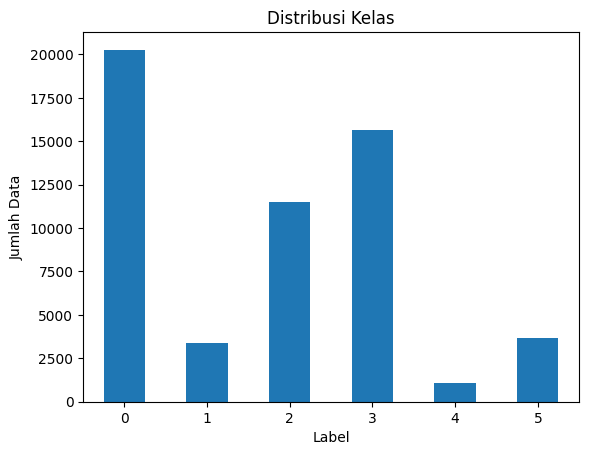

In [25]:
# Hitung jumlah data per label
label_counts = df_combined['label'].value_counts().sort_index()

print(label_counts)  # tampilkan jumlah tiap kelas

# Visualisasi distribusinya
label_counts.plot(kind='bar')
plt.title('Distribusi Kelas')
plt.xlabel('Label')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=0)
plt.show()

In [26]:
df_combined.duplicated().sum()

1054

In [27]:
df_combined = df_combined.drop_duplicates()

In [28]:
df_combined.shape

(54576, 9)

## Training Model

### Model Kompleks

In [29]:
y = df_combined['label']
X = df_combined['final_sentence']

In [30]:
#copy data awal untuk di gunakan di tokenizer
y_cate = y.copy()
X_tok = X.copy()

In [31]:
# Encode label menjadi one-hot
num_classes = 6
labels_encoded = to_categorical(y_cate, num_classes=num_classes)

# Tokenisasi teks
tokenizer = Tokenizer(num_words=20000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_tok)
sequences = tokenizer.texts_to_sequences(X_tok)

# Padding sequence supaya panjangnya sama
max_len = 200
teKs = pad_sequences(sequences, maxlen=max_len, padding='post')


# Simpan tokenizer
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

In [32]:
model_LSTM2 = Sequential()
model_LSTM2.add(Embedding(input_dim=20000, output_dim=300))  # embedding dim diperbesar

model_LSTM2.add(Bidirectional(LSTM(128, dropout=0.3, recurrent_dropout=0.3, 
                                  kernel_regularizer=l2(0.005), return_sequences=True)))
model_LSTM2.add(Bidirectional(LSTM(64, dropout=0.3, recurrent_dropout=0.3, 
                                  kernel_regularizer=l2(0.005))))

model_LSTM2.add(Dense(128, activation='relu'))
model_LSTM2.add(BatchNormalization())
model_LSTM2.add(Dropout(0.4))

model_LSTM2.add(Dense(64, activation='relu'))
model_LSTM2.add(BatchNormalization())
model_LSTM2.add(Dropout(0.4))

model_LSTM2.add(Dense(32, activation='relu'))

model_LSTM2.add(Dense(6, activation='softmax'))

optimizer = Adam(learning_rate=0.001)  # learning rate dikurangi

model_LSTM2.compile(loss='categorical_crossentropy',
                   optimizer=optimizer,
                   metrics=['accuracy'])


In [33]:
class AccuracyThreshold(Callback):
    def __init__(self, accuracy=0.94):
        super(AccuracyThreshold, self).__init__()
        self.accuracy = accuracy

    def on_epoch_end(self, epoch, logs=None):
        val_acc = logs.get('val_accuracy')  # Bisa juga 'val_acc' tergantung Keras versi
        if val_acc is not None:
            if val_acc >= self.accuracy:
                print(f"\nReached {self.accuracy*100:.2f}% val accuracy, stopping training!")
                self.model.stop_training = True



# Callback custom untuk akurasi
accuracy_threshold = AccuracyThreshold(accuracy=0.94)

In [34]:
X_train2, X_temp, y_train2,y_temp = train_test_split(teKs, labels_encoded, test_size=0.3, random_state=42)
X_val2, X_test2, y_val2, y_test2 = train_test_split(
    X_temp, y_temp, test_size=2/3, random_state=42, stratify=y_temp)

In [38]:
# Saat fit model, tambahkan callbacks
model_LSTM2.fit(X_train2, y_train2, epochs=50, batch_size=64, validation_data=(X_val2, y_val2),
               callbacks=[accuracy_threshold])

Epoch 1/50
597/597 ━━━━━━━━━━━━━━━━━━━━ 1546s 3s/step - accuracy: 0.4207 - loss: 3.6505 - val_accuracy: 0.5919 - val_loss: 1.3250
Epoch 2/50
597/597 ━━━━━━━━━━━━━━━━━━━━ 1384s 2s/step - accuracy: 0.6473 - loss: 1.1870 - val_accuracy: 0.6315 - val_loss: 1.0996
Epoch 3/50
597/597 ━━━━━━━━━━━━━━━━━━━━ 1065s 2s/step - accuracy: 0.6661 - loss: 1.0526 - val_accuracy: 0.6417 - val_loss: 1.0919
Epoch 4/50
597/597 ━━━━━━━━━━━━━━━━━━━━ 907s 2s/step - accuracy: 0.6839 - loss: 1.0158 - val_accuracy: 0.6394 - val_loss: 1.1210
Epoch 5/50
597/597 ━━━━━━━━━━━━━━━━━━━━ 1009s 2s/step - accuracy: 0.6945 - loss: 0.9972 - val_accuracy: 0.6271 - val_loss: 1.1091
Epoch 6/50
597/597 ━━━━━━━━━━━━━━━━━━━━ 957s 2s/step - accuracy: 0.7072 - loss: 0.9361 - val_accuracy: 0.6507 - val_loss: 1.0823
Epoch 7/50
597/597 ━━━━━━━━━━━━━━━━━━━━ 1106s 2s/step - accuracy: 0.7223 - loss: 0.8980 - val_accuracy: 0.6570 - val_loss: 1.0587
Epoch 8/50
597/597 ━━━━━━━━━━━━━━━━━━━━ 1441s 2s/step - accuracy: 0.7281 - loss: 0.8931 - va

In [39]:
from sklearn.metrics import accuracy_score, precision_score, classification_report

loss, acc = model_LSTM2.evaluate(X_test2, y_test2)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {acc:.4f}")

# Laporan klasifikasi
y_pred = model_LSTM2.predict(X_test2)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test2, axis=1)

print(classification_report(y_true, y_pred_classes))

342/342 ━━━━━━━━━━━━━━━━━━━━ 23s 66ms/step - accuracy: 0.6407 - loss: 1.4511
Test Loss: 1.4521
Test Accuracy: 0.6404
342/342 ━━━━━━━━━━━━━━━━━━━━ 23s 64ms/step
              precision    recall  f1-score   support

           0       0.76      0.70      0.73      3921
           1       0.57      0.42      0.48       653
           2       0.51      0.69      0.58      2284
           3       0.75      0.72      0.73      3109
           4       0.39      0.25      0.30       215
           5       0.21      0.18      0.19       734

    accuracy                           0.64     10916
   macro avg       0.53      0.49      0.50     10916
weighted avg       0.65      0.64      0.64     10916



In [43]:
model_LSTM2.save('model_LSTM_fin.h5')
model_LSTM2.save('model_LSTM_fin.keras')

In [39]:
model = load_model('model_LSTM_fin.keras')
class_names = ['Borderline Personality Disorder (BPD)', 
               'Bipolar', 
               'Depression', 
               'Anxiety', 
               'Schizophrenia', 
               'Mentalillness']


# Load tokenizer yang digunakan saat training
with open('tokenizer.pkl', 'rb') as f:
    tokenizer = pickle.load(f)

# Fungsi preprocessing dan prediksi
def predict_text(text, model, tokenizer, maxlen=100):
    # Kelas
    class_names = [
        'Borderline Personality Disorder (BPD)',
        'Bipolar',
        'Depression',
        'Anxiety',
        'Schizophrenia',
        'Mentalillness'
    ]

    # Rekomendasi penanganan untuk tiap kelas
    rekomendasi = {
        'Borderline Personality Disorder (BPD)': "Lakukan terapi reguler, pelajari manajemen emosi, dan jaga hubungan interpersonal yang sehat.",
        'Bipolar': "Jaga pola tidur dan aktivitas harian, dan konsultasikan dengan psikiater untuk pengobatan dan terapi.",
        'Depression': "Coba aktivitas fisik ringan, jaga komunikasi sosial, dan pertimbangkan bantuan profesional.",
        'Anxiety': "Latihan pernapasan, mindfulness, dan hindari konsumsi kafein berlebihan. Konsultasi jika cemas berkepanjangan.",
        'Schizophrenia': "Terapi dan pengobatan rutin sangat penting. Dukungan keluarga dan lingkungan aman sangat membantu.",
        'Mentalillness': "Langkah awal seperti journaling, curhat, dan konsultasi psikolog bisa membantu mengidentifikasi masalah."
    }

    # Preprocessing
    sequence = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(sequence, maxlen=maxlen, padding='post', truncating='post')

    # Prediksi
    prediction = model.predict(padded)[0]
    predicted_label = class_names[prediction.argmax()]
    confidence = prediction.max() * 100

    # Output
    print(f"Teks Masukan: {text}\n")
    print(f"Prediksi Kelas: {predicted_label}")
    print(f"Tingkat Keyakinan: {confidence:.2f}%")
    print("\nRekomendasi Penanganan:")
    print(rekomendasi[predicted_label])

    return predicted_label, confidence, rekomendasi[predicted_label]

In [40]:
text_input = "saya tidak bisa tidur saya tidak punya kendali, saya stress hidup saya hancur "
predict_text(text_input, model, tokenizer)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Teks Masukan: saya tidak bisa tidur saya tidak punya kendali, saya stress hidup saya hancur 

Prediksi Kelas: Depression
Tingkat Keyakinan: 73.39%

Rekomendasi Penanganan:
Coba aktivitas fisik ringan, jaga komunikasi sosial, dan pertimbangkan bantuan profesional.


('Depression',
 73.38942289352417,
 'Coba aktivitas fisik ringan, jaga komunikasi sosial, dan pertimbangkan bantuan profesional.')

In [41]:
text_input = input("Masukkan kalimat yang ingin diprediksi: ")
predict_text(text_input, model, tokenizer)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Teks Masukan: sakit jiwaaaaaaaaaaaa , diriku sakit aku menggila , arrggrrgrgrggr , mau nagis sakit , gagal semua usahaku , siallll!!!!!!

Prediksi Kelas: Anxiety
Tingkat Keyakinan: 98.94%

Rekomendasi Penanganan:
Latihan pernapasan, mindfulness, dan hindari konsumsi kafein berlebihan. Konsultasi jika cemas berkepanjangan.


('Anxiety',
 98.93707036972046,
 'Latihan pernapasan, mindfulness, dan hindari konsumsi kafein berlebihan. Konsultasi jika cemas berkepanjangan.')